In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings

In [2]:
# remove warnings

warnings.filterwarnings("ignore")

In [3]:
with open(r"accounton_data.json",'r') as json_file:
    raw_data = json.load(json_file)

In [4]:
df = pd.json_normalize(raw_data)
df.head()

,company_name,nace_code,vat_number,zipcode,city,creation_date,legal_form,company_category,province,ebit.2020,...,net_added_value.2018,net_added_value.2017,net_added_value.2016,net_added_value.2015,staff_costs.2020,staff_costs.2019,staff_costs.2018,staff_costs.2016,staff_costs.2017,staff_costs.2015
0,FREQUENSEA,47594,BE0765414330,8400,OOSTENDE,2021/03/16,Private company,None,West-Flanders,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,THE CONTENT MAKERS,82300,BE0685384578,9831,DEURLE,2017/11/15,Private company with limited liability,Small,East-Flanders,-5340.0,...,7800.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,NEW REUBENS SPORT,47785,BE0506833512,8340,SIJSELE,2014/12/15,Private company with limited liability,Small,West-Flanders,-1186.0,...,33493.0,74107.0,61687.0,73463.0,7140.0,27664.0,33445.0,34954.0,32223.0,31226.0
3,DIEVERTECH,33120,BE0538788775,8490,ZERKEGEM,2013/09/18,Private company,Small,West-Flanders,62157.0,...,66483.0,43259.0,63538.0,55781.0,NaN,NaN,NaN,0.0,NaN,0.0
4,TRAGURIUM,56101,BE0736478933,9100,SINT-NIKLAAS,2019/10/15,Private company,Small,East-Flanders,-2247.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1 = df[df['ebit.2019'].notna()]

In [6]:
# splitting the data frame based on 'company_category'
df_Large = df1.loc[df1['company_category']== "Large",:]
df_Medium = df1.loc[df1['company_category']== 'Medium sized',:]
df_Small = df1.loc[df1['company_category']== 'Small',:]
df_Very_large= df1.loc[df1['company_category']== 'Very large',:]

In [7]:
years = ['2015', '2016','2017','2018','2019','2020']
Features = ['ebit', 'ebitda' , 'profit_and_loss_after_taxes' , 'total_assets' , 'total_liabilities' , 'operating_profit_and_loss' , 'financial_profit_and_loss' , 'staff_count', 'revenue' , 'net_added_value' , 'staff_costs']
for feature in Features:
    for year in years:
        df_Large[f'{feature}.{year}'][df_Large[f'{feature}.{year}'].isna()] = df_Large[f'{feature}.{year}'].mean()
        df_Medium[f'{feature}.{year}'][df_Medium[f'{feature}.{year}'].isna()] = df_Medium[f'{feature}.{year}'].mean()
        df_Small[f'{feature}.{year}'][df_Small[f'{feature}.{year}'].isna()] = df_Small[f'{feature}.{year}'].mean()
        df_Very_large[f'{feature}.{year}'][df_Very_large[f'{feature}.{year}'].isna()] = df_Very_large[f'{feature}.{year}'].mean()

In [8]:
# concatenate the subsets to get the clean dataframe
Total_clean_df = pd.DataFrame()
all_df1 = [df_Large,df_Medium,df_Small, df_Very_large ]
for each_df in all_df1:
    Total_clean_df = pd.concat([Total_clean_df,each_df])
Total_clean_df.shape

(38322, 75)

In [9]:
Total_clean_df.isna().sum()

company_name        0
nace_code           0
vat_number          0
zipcode             0
city                0
                   ..
staff_costs.2019    0
staff_costs.2018    0
staff_costs.2016    0
staff_costs.2017    0
staff_costs.2015    0
Length: 75, dtype: int64

In [10]:
Total_clean_df.head()

,company_name,nace_code,vat_number,zipcode,city,creation_date,legal_form,company_category,province,ebit.2020,...,net_added_value.2018,net_added_value.2017,net_added_value.2016,net_added_value.2015,staff_costs.2020,staff_costs.2019,staff_costs.2018,staff_costs.2016,staff_costs.2017,staff_costs.2015
19,ELECTRO TECHNISCH INSTALLATEURS- BEDRIJF V. VA...,43211,BE0411106091,2140,BORGERHOUT,1971/08/18,Private company,Large,Antwerp,2320993.0,...,3261519.0,3.452404e+06,2.584375e+06,2.330114e+06,2121355.0,1806774.0,1939225.0,1.716720e+06,2.142957e+06,1.499818e+06
45,IDE WOODS,16100,BE0457310260,9870,ZULTE,1996/01/29,Private company,Large,East-Flanders,-987115.0,...,2295872.0,3.838416e+06,1.290877e+06,1.284651e+06,1517461.0,1431187.0,1520227.0,1.272918e+06,1.300824e+06,1.455056e+06
67,SYNAMEDIA VIVIDTEC EUROPE,63110,BE0704700941,8500,KORTRIJK,2018/09/17,Private company with limited liability,Large,West-Flanders,57401.0,...,6968454.0,4.578464e+06,4.416739e+06,4.055083e+06,14496971.0,12870218.0,5656477.0,2.627385e+06,2.769707e+06,2.553909e+06
99,R EN B MODE,46423,BE0458389435,3580,BERINGEN,1996/07/02,Private company with limited liability,Large,Limburg,-47386.0,...,337929.0,6.467160e+05,4.278710e+05,4.904680e+05,162985.0,226432.0,209027.0,1.916920e+05,2.007760e+05,1.474640e+05
108,GEMDIAM,46761,BE0422578322,2610,WILRIJK,1982/04/20,Private company with limited liability,Large,Antwerp,4125878.0,...,2795216.0,2.065233e+06,1.349012e+06,2.323700e+04,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
reshape_df = pd.DataFrame()
full_df = pd.DataFrame()
years = ['2015', '2016','2017', '2018','2019']
Features = ['ebit', 'ebitda' , 'profit_and_loss_after_taxes' , 'total_assets' , 'total_liabilities' , 'operating_profit_and_loss' , 'financial_profit_and_loss' , 'staff_count' , 'net_added_value' , 'staff_costs']

for y in years:

                reshape_df['company_name'] = Total_clean_df['company_name']
                reshape_df['company_category'] = Total_clean_df['company_category']
                reshape_df['province'] = Total_clean_df['province']
                reshape_df['Year'] = y
                
                for f in Features:
                    reshape_df[f"{f}"] = Total_clean_df[f"{f}.{y}"]
                reshape_df[f"current_revenue"] = Total_clean_df[f"revenue.{y}"]
                reshape_df[f"next_year_revenue"] = Total_clean_df[f"revenue.{str(int(y)+1)}"]
                
                full_df = pd.concat([full_df,reshape_df], axis=0)

full_df = full_df.sort_values(by=['company_name','Year'])
full_df

,company_name,company_category,province,Year,ebit,ebitda,profit_and_loss_after_taxes,total_assets,total_liabilities,operating_profit_and_loss,financial_profit_and_loss,staff_count,net_added_value,staff_costs,current_revenue,next_year_revenue
7404,#RTFW,Small,Limburg,2015,25547.754355,44677.521763,15054.353908,349915.669701,349899.725352,25548.941187,-2822.199587,2.996941,81275.050440,31125.695875,326783.646737,293393.472754
7404,#RTFW,Small,Limburg,2016,25891.556466,45433.443489,15754.907404,365860.233446,365827.259537,25892.728454,-2488.603024,12.981550,82739.640143,53001.995394,293393.472754,307278.386130
7404,#RTFW,Small,Limburg,2017,25400.202360,44578.907248,14946.958128,358836.907131,358822.051971,25401.272789,-2219.911341,3.072912,80635.975008,62784.825279,307278.386130,263036.495722
7404,#RTFW,Small,Limburg,2018,-10210.000000,-9975.000000,-10734.000000,48610.000000,48610.000000,-10210.000000,-525.000000,3.049934,-4752.000000,66823.477347,263036.495722,243388.674330
7404,#RTFW,Small,Limburg,2019,4393.000000,9284.000000,3528.000000,66066.000000,66066.000000,4393.000000,-1020.000000,3.107081,11924.000000,70569.577119,243388.674330,210704.559804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,³FALCON & FRENS²,Small,Antwerp,2015,25547.754355,44677.521763,15054.353908,36537.000000,36537.000000,25548.941187,-2822.199587,2.996941,81275.050440,0.000000,326783.646737,293393.472754
30403,³FALCON & FRENS²,Small,Antwerp,2016,-13822.000000,-13822.000000,-13822.000000,627020.000000,627020.000000,-13822.000000,-2488.603024,12.981550,-13822.000000,53001.995394,293393.472754,307278.386130
30403,³FALCON & FRENS²,Small,Antwerp,2017,15619.000000,15619.000000,15600.000000,633832.000000,633832.000000,15619.000000,-19.000000,3.072912,15677.000000,62784.825279,307278.386130,263036.495722
30403,³FALCON & FRENS²,Small,Antwerp,2018,-1292.000000,-1292.000000,-1451.000000,634833.000000,634833.000000,-1292.000000,-158.000000,3.049934,-250.000000,0.000000,263036.495722,243388.674330


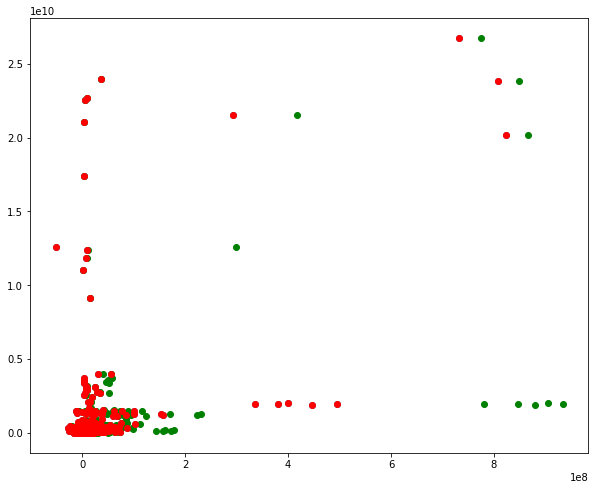

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x=full_df['ebit'], y=full_df['next_year_revenue'])
plt.scatter(x=full_df['ebitda'], y=full_df['next_year_revenue'], color='green')
plt.scatter(x=full_df['operating_profit_and_loss'], y=full_df['next_year_revenue'], color='red')

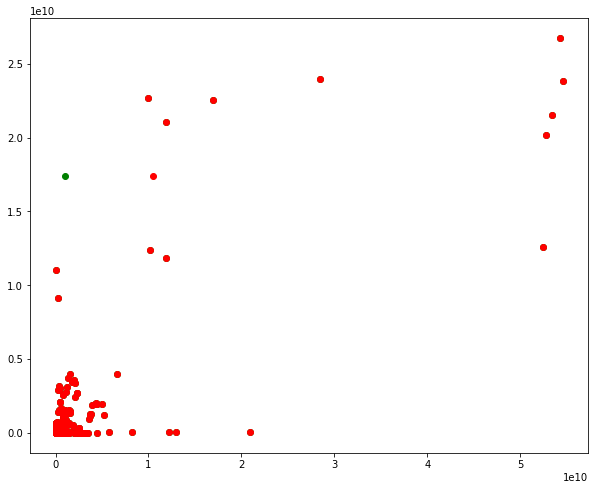

In [13]:
plt.figure(figsize=(10,8))
#plt.scatter(x=full_df['profit_and_loss_after_taxes'], y=full_df['next_year_revenue'])
plt.scatter(x=full_df['total_assets'], y=full_df['next_year_revenue'], color='green')
plt.scatter(x=full_df['total_liabilities'], y=full_df['next_year_revenue'], color='red')

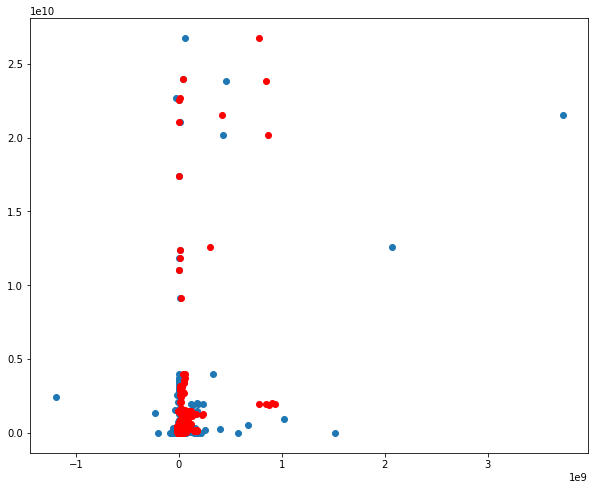

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x=full_df['profit_and_loss_after_taxes'], y=full_df['next_year_revenue'])
plt.scatter(x=full_df['ebitda'], y=full_df['next_year_revenue'], color='red')

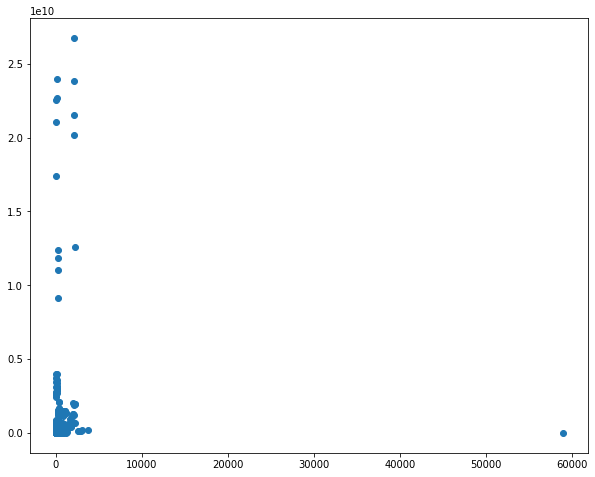

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x=full_df['staff_count'], y=full_df['next_year_revenue'])
#plt.scatter(x=full_df['staff_costs'], y=full_df['next_year_revenue'], color='red')

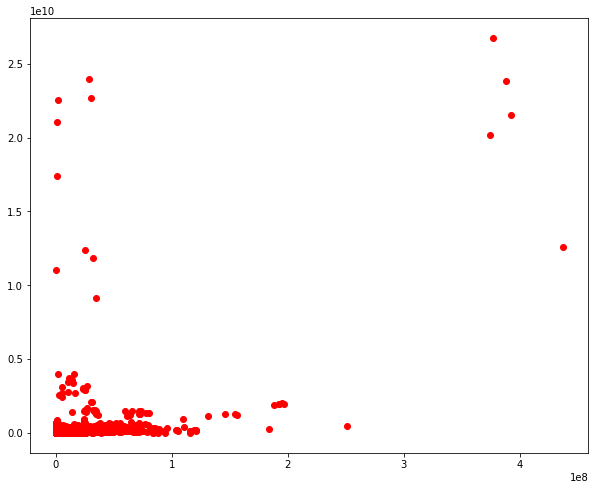

In [16]:
plt.figure(figsize=(10,8))
#plt.scatter(x=full_df['staff_count'], y=full_df['next_year_revenue'])
plt.scatter(x=full_df['staff_costs'], y=full_df['next_year_revenue'], color='red')

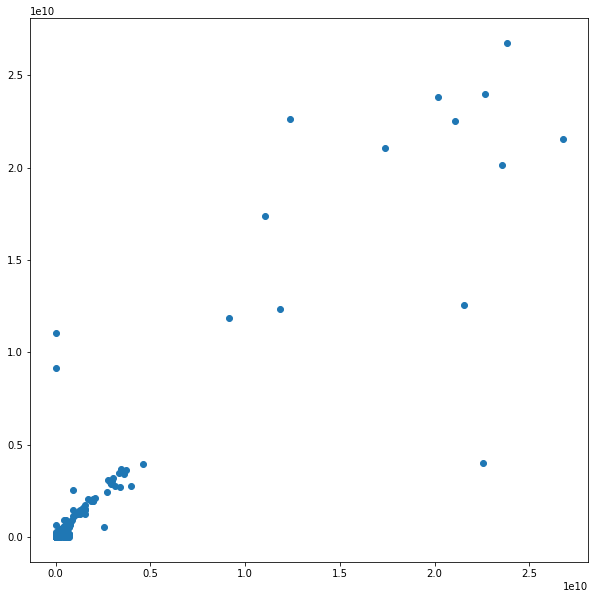

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x=full_df['current_revenue'], y=full_df['next_year_revenue'])


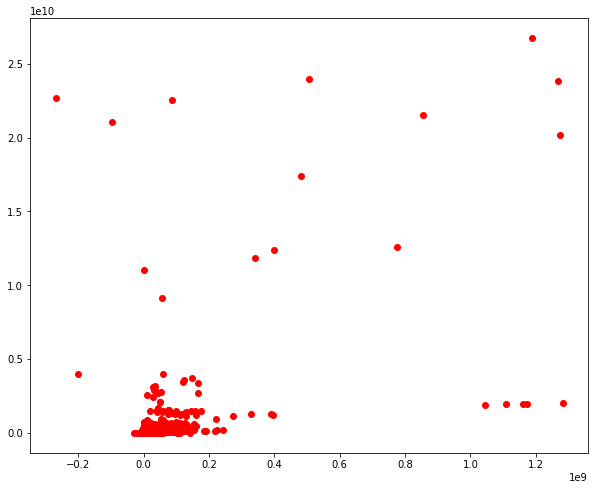

In [18]:
plt.figure(figsize=(10,8))
#plt.scatter(x=full_df['financial_profit_and_loss'], y=full_df['next_year_revenue'])
plt.scatter(x=full_df['net_added_value'], y=full_df['next_year_revenue'], color='red')

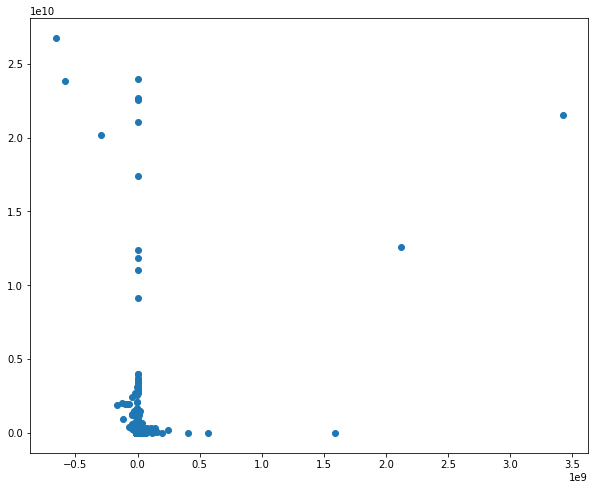

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x=full_df['financial_profit_and_loss'], y=full_df['next_year_revenue'])

In [20]:
corr = full_df.corr()
corr

,ebit,ebitda,profit_and_loss_after_taxes,total_assets,total_liabilities,operating_profit_and_loss,financial_profit_and_loss,staff_count,net_added_value,staff_costs,current_revenue,next_year_revenue
ebit,1.000000,0.929017,0.276712,0.688084,0.686113,1.000000,-0.065440,0.130985,0.868619,0.647093,0.546006,0.540653
ebitda,0.929017,1.000000,0.320269,0.601134,0.599391,0.929017,0.026448,0.143192,0.936754,0.668798,0.480341,0.456304
profit_and_loss_after_taxes,0.276712,0.320269,1.000000,0.587712,0.585924,0.276712,0.859860,0.071006,0.386325,0.446159,0.465109,0.356302
total_assets,0.688084,0.601134,0.587712,1.000000,0.997457,0.688084,0.377212,0.095842,0.666194,0.632344,0.852037,0.792327
total_liabilities,0.686113,0.599391,0.585924,0.997457,1.000000,0.686113,0.376040,0.095579,0.672558,0.630505,0.860224,0.806615
operating_profit_and_loss,1.000000,0.929017,0.276712,0.688084,0.686113,1.000000,-0.065440,0.130985,0.868619,0.647093,0.546006,0.540653
financial_profit_and_loss,-0.065440,0.026448,0.859860,0.377212,0.376040,-0.065440,1.000000,0.027042,0.109617,0.238896,0.308857,0.184082
staff_count,0.130985,0.143192,0.071006,0.095842,0.095579,0.130985,0.027042,1.000000,0.186197,0.241442,0.086119,0.081602
net_added_value,0.868619,0.936754,0.386325,0.666194,0.672558,0.868619,0.109617,0.186197,1.000000,0.819744,0.563531,0.548803
staff_costs,0.647093,0.668798,0.446159,0.632344,0.630505,0.647093,0.238896,0.241442,0.819744,1.000000,0.530821,0.485157


In [21]:
full_df = full_df[['company_category', 'province', 'ebit', 'total_liabilities', 'net_added_value', 'staff_costs', 'current_revenue', 'next_year_revenue']]
full_df.head()

,company_category,province,ebit,total_liabilities,net_added_value,staff_costs,current_revenue,next_year_revenue
7404,Small,Limburg,25547.754355,349899.725352,81275.050440,31125.695875,326783.646737,293393.472754
7404,Small,Limburg,25891.556466,365827.259537,82739.640143,53001.995394,293393.472754,307278.386130
7404,Small,Limburg,25400.202360,358822.051971,80635.975008,62784.825279,307278.386130,263036.495722
7404,Small,Limburg,-10210.000000,48610.000000,-4752.000000,66823.477347,263036.495722,243388.674330
7404,Small,Limburg,4393.000000,66066.000000,11924.000000,70569.577119,243388.674330,210704.559804


In [22]:
# Using the categorical columns 

df_category = pd.get_dummies(full_df['company_category'])
full_df = pd.concat([full_df, df_category], axis=1)
df_province = pd.get_dummies(full_df['province'])
training_df = pd.concat([full_df, df_province], axis=1)
training_df

,company_category,province,ebit,total_liabilities,net_added_value,staff_costs,current_revenue,next_year_revenue,Large,Medium sized,Small,Very large,Antwerp,East-Flanders,Limburg,Vlaams Brabant,West-Flanders
7404,Small,Limburg,25547.754355,349899.725352,81275.050440,31125.695875,326783.646737,293393.472754,0,0,1,0,0,0,1,0,0
7404,Small,Limburg,25891.556466,365827.259537,82739.640143,53001.995394,293393.472754,307278.386130,0,0,1,0,0,0,1,0,0
7404,Small,Limburg,25400.202360,358822.051971,80635.975008,62784.825279,307278.386130,263036.495722,0,0,1,0,0,0,1,0,0
7404,Small,Limburg,-10210.000000,48610.000000,-4752.000000,66823.477347,263036.495722,243388.674330,0,0,1,0,0,0,1,0,0
7404,Small,Limburg,4393.000000,66066.000000,11924.000000,70569.577119,243388.674330,210704.559804,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,Small,Antwerp,25547.754355,36537.000000,81275.050440,0.000000,326783.646737,293393.472754,0,0,1,0,1,0,0,0,0
30403,Small,Antwerp,-13822.000000,627020.000000,-13822.000000,53001.995394,293393.472754,307278.386130,0,0,1,0,1,0,0,0,0
30403,Small,Antwerp,15619.000000,633832.000000,15677.000000,62784.825279,307278.386130,263036.495722,0,0,1,0,1,0,0,0,0
30403,Small,Antwerp,-1292.000000,634833.000000,-250.000000,0.000000,263036.495722,243388.674330,0,0,1,0,1,0,0,0,0


In [23]:
training_df = training_df.drop(columns=['company_category', 'province'])
training_df

,ebit,total_liabilities,net_added_value,staff_costs,current_revenue,next_year_revenue,Large,Medium sized,Small,Very large,Antwerp,East-Flanders,Limburg,Vlaams Brabant,West-Flanders
7404,25547.754355,349899.725352,81275.050440,31125.695875,326783.646737,293393.472754,0,0,1,0,0,0,1,0,0
7404,25891.556466,365827.259537,82739.640143,53001.995394,293393.472754,307278.386130,0,0,1,0,0,0,1,0,0
7404,25400.202360,358822.051971,80635.975008,62784.825279,307278.386130,263036.495722,0,0,1,0,0,0,1,0,0
7404,-10210.000000,48610.000000,-4752.000000,66823.477347,263036.495722,243388.674330,0,0,1,0,0,0,1,0,0
7404,4393.000000,66066.000000,11924.000000,70569.577119,243388.674330,210704.559804,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,25547.754355,36537.000000,81275.050440,0.000000,326783.646737,293393.472754,0,0,1,0,1,0,0,0,0
30403,-13822.000000,627020.000000,-13822.000000,53001.995394,293393.472754,307278.386130,0,0,1,0,1,0,0,0,0
30403,15619.000000,633832.000000,15677.000000,62784.825279,307278.386130,263036.495722,0,0,1,0,1,0,0,0,0
30403,-1292.000000,634833.000000,-250.000000,0.000000,263036.495722,243388.674330,0,0,1,0,1,0,0,0,0
